In [2]:
import os
import pandas as pd
import numpy as np

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir("/Users/dhanushkikkisetti/Documents/UMD data hackathon/2024_datasets")

In [4]:
#us_cities=pd.read_excel("/content/us_city_data.xlsx")
us_cities=pd.read_excel("us_city_data.xlsx")

In [177]:
us_cities.head(2)

,city,city_ascii,city_alt,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,...,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_fips,cbsa_name,cbsa_metro,csa_fips,csa_name
0,New York,New York,NaN,NY,New York,36081,Queens,36081|36047|36085|36005|36061,Queens|Kings|Richmond|Bronx|New York,40.6943,...,17.2,13.9,41.1,6.7,2.0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",True,408.0,"New York-Newark, NY-NJ-CT-PA"
1,Los Angeles,Los Angeles,NaN,CA,California,6037,Los Angeles,6037,Los Angeles,34.1141,...,16.6,13.7,31.3,10.6,2.3,31080.0,"Los Angeles-Long Beach-Anaheim, CA",True,348.0,"Los Angeles-Long Beach, CA"


In [5]:
us_cities=us_cities.drop(['city_alt','source','county_fips_all','state_id','county_name','city_ascii','county_fips','county_name_all','lat','lng','zips','id','timezone','cbsa_name','cbsa_fips','csa_fips','csa_name'],axis=1)

In [179]:
us_cities.shape

(109039, 74)

In [6]:
financial_data=pd.read_excel("NBA_financial_data.xlsx")


In [7]:
players_origin=pd.read_csv("/Users/dhanushkikkisetti/Documents/UMD data hackathon/nba-aba-player-birthplaces-QueryResult.csv")

In [8]:
city_count={}
players_origin['city-state']=players_origin['city']+"-"+players_origin['region']
for city,count in zip(list(players_origin['city-state']),list(players_origin['players_origin'])):
    city_count[city]=count

In [9]:
us_cities

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_metro
0,New York,New York,18908608.0,8622467.0,11080.3,False,True,False,False,1,...,15.4,8.9,29.0,11.3,17.2,13.9,41.1,6.7,2.0,True
1,Los Angeles,California,11922389.0,3881041.0,3184.7,False,True,False,False,1,...,24.5,12.7,48.1,10.8,16.6,13.7,31.3,10.6,2.3,True
2,Chicago,Illinois,8497759.0,2721914.0,4614.5,False,True,False,False,1,...,11.3,9.7,29.0,11.4,16.9,7.9,34.1,9.8,2.9,True
3,Miami,Florida,6080145.0,443665.0,4758.9,False,True,False,False,1,...,6.4,32.3,72.3,11.6,20.0,29.9,28.2,19.0,2.0,True
4,Houston,Texas,5970127.0,2296253.0,1384.0,False,True,False,False,1,...,14.3,14.9,44.8,10.4,19.6,13.5,27.4,24.2,3.6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109034,Pennwood,Delaware,NaN,NaN,1026.4,False,False,False,False,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
109035,Buckton,New York,NaN,NaN,20.5,False,False,False,False,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
109036,Millerstown,Pennsylvania,0.0,0.0,28.0,False,False,True,False,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
109037,Hidden Lakes,Ohio,NaN,NaN,18.6,False,False,False,False,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [66]:
players_origin

,region,city,players_origin,city-state
0,Illinois,Chicago,155,Chicago-Illinois
1,Pennsylvania,Philadelphia,122,Philadelphia-Pennsylvania
2,California,Los Angeles,113,Los Angeles-California
3,New York,Brooklyn,107,Brooklyn-New York
4,New York,New York,103,New York-New York
...,...,...,...,...
1743,Maryland,Hagerstown,1,Hagerstown-Maryland
1744,Massachusetts,Winthrop,1,Winthrop-Massachusetts
1745,Michigan,Shelby,1,Shelby-Michigan
1746,Minnesota,Dawson,1,Dawson-Minnesota


In [10]:
#Few changes should be done to the city column in financial data to have the exact spelling in the US data
financial_data.loc[(financial_data['City'] == 'Minnesota'), 'City']='Minneapolis'
financial_data.loc[(financial_data['City'] == 'San Franciso'), 'City']='San Francisco'

In [11]:
financial_data.loc[(financial_data['State'] == 'Washington DC'), 'State']='District of Columbia'
financial_data.loc[(financial_data['City'] == 'Washington DC'), 'City']='Washington'
financial_data.loc[(financial_data['City'] == 'Indianapolis\xa0'), 'City']='Indianapolis'


In [176]:
financial_data.head()

,City,State,Team Name,Arena Sponsor,Arena Cost (millions),Year of Arena Construction,Arena Capacity,Jersey Sponsor,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue
0,Atlanta,Georgia,Atlanta Hawks,State Farm,213.5,1999,16600,YMCA,326,85,159,45.3
1,Boston,Massachusetts,Boston Celtics,TD Bank,160.0,1995,19156,Vistaprint,443,88,185,72.5
2,Brooklyn,New York,Brooklyn Nets,Barclays Bank,1000.0,2012,17732,Webull,367,-5,187,55.1
3,Charlotte,North Carolina,Charlotte Hornets,Spectrum,260.0,2005,19077,Feastables,269,35,165,23.7
4,Chicago,Illinois,Chicago Bulls,United Airlines,175.0,1994,20917,Motorola,372,115,158,70.0


In [12]:
financial_data['city-state']=financial_data['City']+"-"+financial_data['State']

In [13]:
city_state=list(financial_data['city-state'])

In [179]:
city_state

['Atlanta-Georgia',
 'Boston-Massachusetts',
 'Brooklyn-New York',
 'Charlotte-North Carolina',
 'Chicago-Illinois',
 'Cleveland-Ohio',
 'Dallas-Texas',
 'Denver-Colorado',
 'Detroit-Michigan',
 'San Francisco-California',
 'Houston-Texas',
 'Indianapolis-Indiana',
 'Los Angeles-California',
 'Los Angeles-California',
 'Memphis-Tennessee',
 'Miami-Florida',
 'Milwaukee-Wisconsin',
 'Minneapolis-Minnesota',
 'New Orleans-Louisiana',
 'New York-New York',
 'Oklahoma City-Oklahoma',
 'Orlando-Florida',
 'Philadelphia-Pennsylvania',
 'Phoenix-Arizona',
 'Portland-Oregon',
 'Sacramento-California',
 'San Antonio-Texas',
 'Toronto-Canada',
 'Salt Lake City-Utah',
 'Washington-District of Columbia']

In [14]:
us_cities['city_state']=us_cities['city']+"-"+us_cities['state_name']

In [15]:
us_cities['Is_NBA']=us_cities['city_state'].apply(lambda x:1 if x in city_state else 0)

In [16]:
us_cities[us_cities['Is_NBA']==1]

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_metro,city_state,Is_NBA
0,New York,New York,18908608.0,8622467.0,11080.3,False,True,False,False,1,...,29.0,11.3,17.2,13.9,41.1,6.7,2.0,True,New York-New York,1
1,Los Angeles,California,11922389.0,3881041.0,3184.7,False,True,False,False,1,...,48.1,10.8,16.6,13.7,31.3,10.6,2.3,True,Los Angeles-California,1
2,Chicago,Illinois,8497759.0,2721914.0,4614.5,False,True,False,False,1,...,29.0,11.4,16.9,7.9,34.1,9.8,2.9,True,Chicago-Illinois,1
3,Miami,Florida,6080145.0,443665.0,4758.9,False,True,False,False,1,...,72.3,11.6,20.0,29.9,28.2,19.0,2.0,True,Miami-Florida,1
4,Houston,Texas,5970127.0,2296253.0,1384.0,False,True,False,False,1,...,44.8,10.4,19.6,13.5,27.4,24.2,3.6,True,Houston-Texas,1
5,Dallas,Texas,5830932.0,1300642.0,1478.7,False,True,False,False,1,...,42.4,10.9,17.5,9.3,26.4,23.5,3.8,True,Dallas-Texas,1
6,Philadelphia,Pennsylvania,5683533.0,1593208.0,4578.4,False,True,False,False,1,...,15.7,16.9,22.7,6.9,32.8,7.3,4.2,True,Philadelphia-Pennsylvania,1
7,Atlanta,Georgia,5180179.0,494838.0,1412.3,False,True,False,False,1,...,5.4,11.8,17.7,2.0,27.5,10.8,4.3,True,Atlanta-Georgia,1
8,Washington,District of Columbia,5116378.0,670587.0,4235.7,False,True,False,False,1,...,11.5,11.0,15.1,3.1,30.5,3.4,4.0,True,Washington-District of Columbia,1
9,Boston,Massachusetts,4328315.0,665945.0,5319.0,False,True,False,False,1,...,19.6,12.0,17.5,11.2,30.6,3.3,2.4,True,Boston-Massachusetts,1


In [26]:
NBA_demographics=us_cities[us_cities['Is_NBA']==1]

In [27]:
NBA_demographics.to_csv("NBA_Demographics.csv")

In [17]:
us_cities=us_cities*1

In [29]:
us_cities.head()

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_metro,city_state,Is_NBA
0,New York,New York,18908608.0,8622467.0,11080.3,0,1,0,0,1,...,29.0,11.3,17.2,13.9,41.1,6.7,2.0,1,New York-New York,1
1,Los Angeles,California,11922389.0,3881041.0,3184.7,0,1,0,0,1,...,48.1,10.8,16.6,13.7,31.3,10.6,2.3,1,Los Angeles-California,1
2,Chicago,Illinois,8497759.0,2721914.0,4614.5,0,1,0,0,1,...,29.0,11.4,16.9,7.9,34.1,9.8,2.9,1,Chicago-Illinois,1
3,Miami,Florida,6080145.0,443665.0,4758.9,0,1,0,0,1,...,72.3,11.6,20.0,29.9,28.2,19.0,2.0,1,Miami-Florida,1
4,Houston,Texas,5970127.0,2296253.0,1384.0,0,1,0,0,1,...,44.8,10.4,19.6,13.5,27.4,24.2,3.6,1,Houston-Texas,1


In [18]:
def player_origin(city_state):
    if city_state in city_count:
        return city_count[city_state]

In [19]:

us_cities['Players_origin']=us_cities['city_state'].apply(lambda x:player_origin(x))

In [77]:
us_cities.dtypes

city                  object
state_name            object
population           float64
population_proper    float64
density              float64
                      ...   
veteran              float64
cbsa_metro             int64
city_state            object
Is_NBA                 int64
Players_origin       float64
Length: 77, dtype: object

In [20]:
us_cities.head(1)

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_metro,city_state,Is_NBA,Players_origin
0,New York,New York,18908608.0,8622467.0,11080.3,0,1,0,0,1,...,11.3,17.2,13.9,41.1,6.7,2.0,1,New York-New York,1,103.0


In [21]:
us_cities.dropna(subset=['commute_time'],inplace=True)

In [23]:
us_cities.dropna(subset=['income_household_median'],inplace=True)
us_cities.dropna(subset=['income_individual_median'],inplace=True)
us_cities.dropna(subset=['education_stem_degree'],inplace=True)


In [195]:
us_cities[us_cities['Is_NBA']==1].shape

(27, 77)

In [197]:
us_cities.shape

(28866, 77)

In [24]:
#you can try the PCA by removing this column
us_cities.dropna(subset=['rent_burden'],inplace=True)
us_cities.dropna(subset=['home_value'],inplace=True)

In [206]:
new_us_cities=us_cities.drop(['rent_burden','home_value'],axis=1)

In [215]:
pd.set
new_us_cities.isnull().sum()

city                 0
state_name           0
population           0
population_proper    0
density              0
                    ..
veteran              0
cbsa_metro           0
city_state           0
Is_NBA               0
Players_origin       0
Length: 75, dtype: int64

In [25]:
us_cities['Players_origin']=us_cities['Players_origin'].fillna(0)

In [203]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [139]:
us_cities.head()

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,cbsa_metro,city_state,Is_NBA,Players_origin,PCA1,PCA2,ecludian_distance,TSNE1,TSNE2,ecludian_distance_TSNE
0,New York,New York,18908608.0,8622467.0,11080.3,0,1,0,0,1,...,1,New York-New York,1,103.0,1.835744e+07,1.007369e+07,22.002924,-10.013901,63.063496,2.377584
1,Los Angeles,California,11922389.0,3881041.0,3184.7,0,1,0,0,1,...,1,Los Angeles-California,1,113.0,1.116659e+07,5.831539e+06,11.627835,-10.159702,62.976383,2.223660
2,Chicago,Illinois,8497759.0,2721914.0,4614.5,0,1,0,0,1,...,1,Chicago-Illinois,1,155.0,7.781011e+06,4.453746e+06,9.373827,-10.320437,62.875614,2.065572
3,Miami,Florida,6080145.0,443665.0,4758.9,0,1,0,0,1,...,1,Miami-Florida,1,15.0,5.116816e+06,2.790117e+06,4.825627,-10.641124,62.650101,1.774395
4,Houston,Texas,5970127.0,2296253.0,1384.0,0,1,0,0,1,...,1,Houston-Texas,1,43.0,5.558183e+06,3.238844e+06,6.334282,-10.566810,62.708542,1.838907


In [218]:
dummy=list(us_cities['Players_origin'])

In [219]:
#Extracting Numeric data for extracting PCA variables
pca_data=us_cities.iloc[:,2:-3].copy()

In [220]:
pca_data['Players_origin']=dummy

In [221]:
pca_data.head()

,population,population_proper,density,military,incorporated,cdp,township,ranking,age_median,age_under_10,...,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_metro,Players_origin
0,18908608.0,8622467.0,11080.3,0,1,0,0,1,37.5,11.4,...,8.9,29.0,11.3,17.2,13.9,41.1,6.7,2.0,1,103.0
1,11922389.0,3881041.0,3184.7,0,1,0,0,1,36.5,10.6,...,12.7,48.1,10.8,16.6,13.7,31.3,10.6,2.3,1,113.0
2,8497759.0,2721914.0,4614.5,0,1,0,0,1,35.3,10.9,...,9.7,29.0,11.4,16.9,7.9,34.1,9.8,2.9,1,155.0
3,6080145.0,443665.0,4758.9,0,1,0,0,1,39.7,9.8,...,32.3,72.3,11.6,20.0,29.9,28.2,19.0,2.0,1,15.0
4,5970127.0,2296253.0,1384.0,0,1,0,0,1,33.9,13.4,...,14.9,44.8,10.4,19.6,13.5,27.4,24.2,3.6,1,43.0


In [141]:
#Scale columns with high range
cols=['population','population_proper','density']
pca_data[cols]=StandardScaler().fit_transform(pca_data[cols])

In [222]:
#standardize the data
pca_data_scaled = StandardScaler().fit_transform(pca_data)


In [99]:
pca_data_scaled

array([[ 8.49288833e+01,  1.01643659e+02,  1.31264313e+01, ...,
        -1.52559100e+00,  7.30925357e-01,  4.42079363e+01],
       [ 5.35162082e+01,  4.56655311e+01,  3.23916022e+00, ...,
        -1.44397652e+00,  7.30925357e-01,  4.85077152e+01],
       [ 3.81177803e+01,  3.19806693e+01,  5.02962836e+00, ...,
        -1.28074754e+00,  7.30925357e-01,  6.65667869e+01],
       ...,
       [-9.11059077e-02, -1.54099419e-01, -5.56787509e-01, ...,
        -5.65302110e-02,  7.30925357e-01, -7.97870290e-02],
       [-9.11373823e-02, -1.54182062e-01, -7.06431475e-01, ...,
        -2.06968759e+00,  7.30925357e-01, -7.97870290e-02],
       [-9.11778497e-02, -1.54288318e-01, -7.11440478e-01, ...,
        -1.28074754e+00, -1.36812876e+00, -7.97870290e-02]])

In [223]:
pca = PCA(n_components=2)

#fit the PCA object to the data and transform it
df_pca = pca.fit_transform(pca_data)


In [224]:
us_cities["PCA1"]=df_pca[:,0]
us_cities["PCA2"]=df_pca[:,1]


In [225]:
us_cities.head()

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,limited_english,commute_time,health_uninsured,veteran,cbsa_metro,city_state,Is_NBA,Players_origin,PCA1,PCA2
0,New York,New York,18908608.0,8622467.0,11080.3,0,1,0,0,1,...,13.9,41.1,6.7,2.0,1,New York-New York,1,103.0,1.835744e+07,1.007369e+07
1,Los Angeles,California,11922389.0,3881041.0,3184.7,0,1,0,0,1,...,13.7,31.3,10.6,2.3,1,Los Angeles-California,1,113.0,1.116659e+07,5.831539e+06
2,Chicago,Illinois,8497759.0,2721914.0,4614.5,0,1,0,0,1,...,7.9,34.1,9.8,2.9,1,Chicago-Illinois,1,155.0,7.781011e+06,4.453746e+06
3,Miami,Florida,6080145.0,443665.0,4758.9,0,1,0,0,1,...,29.9,28.2,19.0,2.0,1,Miami-Florida,1,15.0,5.116816e+06,2.790117e+06
4,Houston,Texas,5970127.0,2296253.0,1384.0,0,1,0,0,1,...,13.5,27.4,24.2,3.6,1,Houston-Texas,1,43.0,5.558183e+06,3.238844e+06


In [136]:
print(us_cities.shape)
len(us_cities['city'].unique())

(19821, 83)


13167

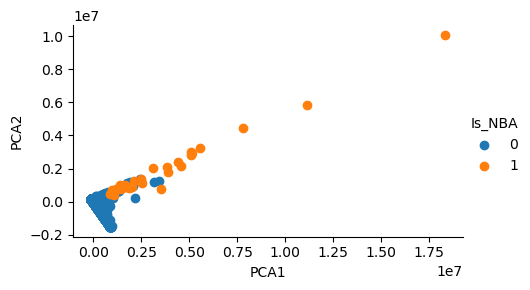

In [226]:
fg = sns.FacetGrid(data=us_cities, hue='Is_NBA', aspect=1.61)
fg.map(plt.scatter, 'PCA1', 'PCA2').add_legend()
# Indices of points to annotate
indices_to_annotate = []  # Example indices, you can adjust this list

# Annotate only specific points
for ax in fg.axes.flat:
    for i in indices_to_annotate:
        city = us_cities.iloc[i]['city']
        pca1 = us_cities.iloc[i]['PCA1']
        pca2 = us_cities.iloc[i]['PCA2']
        ax.annotate(city, (pca1, pca2), fontsize=10)

plt.show()

In [214]:
fg.savefig("PCA_withoutstandardscalar.png")

In [227]:
NBA_coord=[]
for pca1,pca2 in zip(list(us_cities[us_cities['Is_NBA']==1]["PCA1"]),list(us_cities[us_cities['Is_NBA']==1]["PCA2"])):
  NBA_coord.append((pca1,pca2))


In [148]:
NBA_coord

[(516834.64811976644, 3269575.809835994),
 (583891.1957523396, 1388862.6257543673),
 (71320.93323680987, 1122757.2103004737),
 (180674.12620444116, 180929.70668024337),
 (-2643.1038150835593, 891833.9283836737),
 (30895.08350449205, 515620.55661278794),
 (-31611.69477808355, 654161.0583959325),
 (143800.29282000248, 220809.5455552604),
 (458985.14864491223, 305681.7169324299),
 (436331.81075711426, 267166.44003902865),
 (93989.81670062392, 584740.4026717076),
 (-181241.65515043683, 247226.8448417198),
 (1100838.9659873967, 345227.778213054),
 (78977.62637871668, 179662.31219906153),
 (292927.33796745684, 314882.5363273956),
 (274566.8473309862, 276080.08469300787),
 (-49363.63553813827, 538032.7143452549),
 (200698.69413717688, 189722.8474716175),
 (78275.56393219864, 117354.153440687),
 (-64549.15674311325, 351907.71770304086),
 (-166333.06334167707, 165582.4340796169),
 (65351.74079635749, 348368.60693593544),
 (-94514.99409621197, 227267.23301910787),
 (207290.70011680547, 79121.859

In [228]:
from scipy.spatial import distance
def ecludian_dist(point):
  ed=distance.cdist(point, NBA_coord, 'euclidean')
  return np.mean(ed)


In [118]:
ecludian_dist(point=[(1,2)])

8.365674205807203

In [229]:
PCA1=list(us_cities['PCA1'])
PCA2=list(us_cities['PCA2'])

In [230]:
dist=[]
for p1,p2 in zip(PCA1,PCA2):
  dist.append(ecludian_dist(point=[(p1,p2)]))

In [231]:
us_cities["ecludian_distance_pca"]=dist

In [241]:
pd.set_option('display.max_rows', 30)
top30cities_EcludianDistance=us_cities[us_cities['Is_NBA']==0].sort_values("ecludian_distance_pca").head(30)

In [226]:
top30cities_EcludianDistance.to_excel("Top30Cities_PCA_EcludianDistance.xlsx")

In [242]:
top30cities_EcludianDistance

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,commute_time,health_uninsured,veteran,cbsa_metro,city_state,Is_NBA,Players_origin,PCA1,PCA2,ecludian_distance_pca
16,Tampa,Florida,2861173.0,388768.0,1320.9,0,1,0,0,1,...,24.8,11.2,6.4,1,Tampa-Florida,0,6.0,2.455493e+06,1.343023e+06,2.630333e+06
21,Las Vegas,Nevada,2248047.0,644835.0,1755.1,0,1,0,0,1,...,25.9,13.1,8.2,1,Las Vegas-Nevada,0,12.0,2.062566e+06,1.071085e+06,2.683626e+06
20,Riverside,California,2332836.0,316076.0,1503.9,0,1,0,0,1,...,31.3,9.2,4.2,1,Riverside-California,0,10.0,2.077072e+06,9.467691e+05,2.700012e+06
14,San Diego,California,3046560.0,1383987.0,1639.7,0,1,0,0,1,...,24.0,6.9,7.0,1,San Diego-California,0,18.0,3.165207e+06,1.218806e+06,2.703347e+06
22,Baltimore,Maryland,2196524.0,584548.0,2788.2,0,1,0,0,1,...,30.1,5.5,5.3,1,Baltimore-Maryland,0,44.0,1.923112e+06,1.177087e+06,2.708802e+06
27,Austin,Texas,1905945.0,958202.0,1154.1,0,1,0,0,1,...,24.1,12.8,4.2,1,Austin-Texas,0,1.0,1.949682e+06,8.842496e+05,2.730534e+06
12,Seattle,Washington,3561397.0,734603.0,3376.6,0,1,0,0,1,...,27.2,4.5,3.8,1,Seattle-Washington,0,29.0,3.419033e+06,1.263768e+06,2.744013e+06
23,St. Louis,Missouri,2130881.0,298018.0,1864.3,0,1,0,0,1,...,23.0,10.1,5.9,1,St. Louis-Missouri,0,35.0,1.758154e+06,1.121995e+06,2.754379e+06
37,Columbus,Ohio,1572546.0,902449.0,1581.0,0,1,0,0,1,...,22.0,9.4,5.3,1,Columbus-Ohio,0,22.0,1.534200e+06,9.322993e+05,2.844916e+06
35,Kansas City,Missouri,1689556.0,505958.0,620.7,0,1,0,0,1,...,22.0,11.7,6.0,1,Kansas City-Missouri,0,12.0,1.491272e+06,9.178266e+05,2.866777e+06


In [93]:
us_cities.head()


,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,commute_time,health_uninsured,veteran,cbsa_metro,city_state,Is_NBA,PCA1,PCA2,point,ecludian_distance
0,New York,New York,18908608.0,8622467.0,11080.3,0,1,0,0,1,...,41.1,6.7,2.0,1,New York-New York,1,1.835744e+07,1.007369e+07,0 7.190288\n1 3.886376\n2 ...,1.658115e+07
1,Los Angeles,California,11922389.0,3881041.0,3184.7,0,1,0,0,1,...,31.3,10.6,2.3,1,Los Angeles-California,1,1.116659e+07,5.831539e+06,0 7.190288\n1 3.886376\n2 ...,8.859319e+06
2,Chicago,Illinois,8497759.0,2721914.0,4614.5,0,1,0,0,1,...,34.1,9.8,2.9,1,Chicago-Illinois,1,7.781011e+06,4.453746e+06,0 7.190288\n1 3.886376\n2 ...,5.769181e+06
3,Miami,Florida,6080145.0,443665.0,4758.9,0,1,0,0,1,...,28.2,19.0,2.0,1,Miami-Florida,1,5.116816e+06,2.790117e+06,0 7.190288\n1 3.886376\n2 ...,3.399291e+06
4,Houston,Texas,5970127.0,2296253.0,1384.0,0,1,0,0,1,...,27.4,24.2,3.6,1,Houston-Texas,1,5.558183e+06,3.238844e+06,0 7.190288\n1 3.886376\n2 ...,3.807706e+06


In [254]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(pca_data)




/Users/dhanushkikkisetti/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dhanushkikkisetti/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [255]:
us_cities["TSNE1"]=X_tsne[:,0]
us_cities["TSNE2"]=X_tsne[:,1]

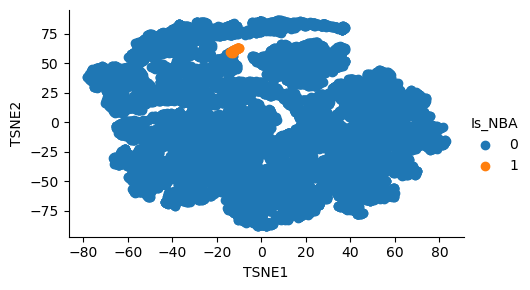

In [256]:
fg = sns.FacetGrid(data=us_cities, hue='Is_NBA', aspect=1.61)
fg.map(plt.scatter, 'TSNE1', 'TSNE2').add_legend()
# Indices of points to annotate
indices_to_annotate = []  # Example indices, you can adjust this list

# Annotate only specific points
for ax in fg.axes.flat:
    for i in indices_to_annotate:
        city = us_cities.iloc[i]['city']
        pca1 = us_cities.iloc[i]['TSNE1']
        pca2 = us_cities.iloc[i]['TSNE2']
        ax.annotate(city, (pca1, pca2), fontsize=10)

plt.show()

In [257]:
NBA_coord=[]
for tsne1,tsne2 in zip(list(us_cities[us_cities['Is_NBA']==1]["TSNE1"]),list(us_cities[us_cities['Is_NBA']==1]["TSNE2"])):
  NBA_coord.append((tsne1,tsne2))

In [258]:
TSNE1=list(us_cities['TSNE1'])
TSNE2=list(us_cities['TSNE2'])

In [259]:
dist=[]
for p1,p2 in zip(TSNE1,TSNE2):
  dist.append(ecludian_dist(point=[(p1,p2)]))

In [260]:
us_cities["ecludian_distance_TSNE"]=dist

In [138]:
us_cities.to_excel("Reduced_dimensionality_new.xlsx")

In [261]:
pd.set_option('display.max_rows', 30)
top30cities_EcludianDistance=us_cities[us_cities['Is_NBA']==0].sort_values("ecludian_distance_TSNE").head(30)

In [262]:
top30cities_EcludianDistance

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,cbsa_metro,city_state,Is_NBA,Players_origin,PCA1,PCA2,ecludian_distance_pca,TSNE1,TSNE2,ecludian_distance_TSNE
16,Tampa,Florida,2861173.0,388768.0,1320.9,0,1,0,0,1,...,1,Tampa-Florida,0,6.0,2.455493e+06,1.343023e+06,2.630333e+06,-11.578314,61.621250,1.524787
14,San Diego,California,3046560.0,1383987.0,1639.7,0,1,0,0,1,...,1,San Diego-California,0,18.0,3.165207e+06,1.218806e+06,2.703347e+06,-11.419856,61.979309,1.538674
12,Seattle,Washington,3561397.0,734603.0,3376.6,0,1,0,0,1,...,1,Seattle-Washington,0,29.0,3.419033e+06,1.263768e+06,2.744013e+06,-11.233334,62.099140,1.546175
20,Riverside,California,2332836.0,316076.0,1503.9,0,1,0,0,1,...,1,Riverside-California,0,10.0,2.077072e+06,9.467691e+05,2.700012e+06,-11.839882,61.224499,1.581526
21,Las Vegas,Nevada,2248047.0,644835.0,1755.1,0,1,0,0,1,...,1,Las Vegas-Nevada,0,12.0,2.062566e+06,1.071085e+06,2.683626e+06,-11.998861,61.202724,1.594912
22,Baltimore,Maryland,2196524.0,584548.0,2788.2,0,1,0,0,1,...,1,Baltimore-Maryland,0,44.0,1.923112e+06,1.177087e+06,2.708802e+06,-12.011600,61.113308,1.607724
23,St. Louis,Missouri,2130881.0,298018.0,1864.3,0,1,0,0,1,...,1,St. Louis-Missouri,0,35.0,1.758154e+06,1.121995e+06,2.754379e+06,-11.954694,60.952663,1.639852
27,Austin,Texas,1905945.0,958202.0,1154.1,0,1,0,0,1,...,1,Austin-Texas,0,1.0,1.949682e+06,8.842496e+05,2.730534e+06,-12.495848,61.107292,1.738726
31,Pittsburgh,Pennsylvania,1749091.0,303843.0,2118.5,0,1,0,0,1,...,1,Pittsburgh-Pennsylvania,0,23.0,1.453284e+06,9.393454e+05,2.882900e+06,-12.179323,60.531799,1.807105
35,Kansas City,Missouri,1689556.0,505958.0,620.7,0,1,0,0,1,...,1,Kansas City-Missouri,0,12.0,1.491272e+06,9.178266e+05,2.866777e+06,-12.356412,60.547211,1.831133


In [ ]:
#Finding patterns through one class classification

In [227]:
from sklearn.svm import OneClassSVM

In [228]:
nba_data=us_cities[us_cities['Is_NBA']==1]
nba_data=nba_data.iloc[:,2:-6]

In [229]:
nba_data

,population,population_proper,density,military,incorporated,cdp,township,ranking,age_median,age_under_10,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
0,18908608.0,8622467.0,11080.3,0,1,0,0,1,37.5,11.4,...,0.1,15.4,8.9,29.0,11.3,17.2,13.9,41.1,6.7,2.0
1,11922389.0,3881041.0,3184.7,0,1,0,0,1,36.5,10.6,...,0.1,24.5,12.7,48.1,10.8,16.6,13.7,31.3,10.6,2.3
2,8497759.0,2721914.0,4614.5,0,1,0,0,1,35.3,10.9,...,0.1,11.3,9.7,29.0,11.4,16.9,7.9,34.1,9.8,2.9
3,6080145.0,443665.0,4758.9,0,1,0,0,1,39.7,9.8,...,0.0,6.4,32.3,72.3,11.6,20.0,29.9,28.2,19.0,2.0
4,5970127.0,2296253.0,1384.0,0,1,0,0,1,33.9,13.4,...,0.1,14.3,14.9,44.8,10.4,19.6,13.5,27.4,24.2,3.6
5,5830932.0,1300642.0,1478.7,0,1,0,0,1,33.1,13.6,...,0.0,10.9,13.1,42.4,10.9,17.5,9.3,26.4,23.5,3.8
6,5683533.0,1593208.0,4578.4,0,1,0,0,1,34.8,12.0,...,0.1,8.5,6.3,15.7,16.9,22.7,6.9,32.8,7.3,4.2
7,5180179.0,494838.0,1412.3,0,1,0,0,1,33.6,10.4,...,0.0,1.8,4.7,5.4,11.8,17.7,2.0,27.5,10.8,4.3
8,5116378.0,670587.0,4235.7,0,1,0,0,1,34.8,11.4,...,0.1,4.6,7.1,11.5,11.0,15.1,3.1,30.5,3.4,4.0
9,4328315.0,665945.0,5319.0,0,1,0,0,1,32.9,8.7,...,0.1,6.8,12.0,19.6,12.0,17.5,11.2,30.6,3.3,2.4


In [230]:
...
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)

In [231]:
model.fit(nba_data)

OneClassSVM(nu=0.01)

In [232]:
non_NBA_data=us_cities[us_cities['Is_NBA']==0]
non_NBA_data_new=non_NBA_data.iloc[:,2:-6]

In [233]:
y_hat=model.predict(non_NBA_data_new)

In [234]:
y_hat

array([ 1,  1,  1, ..., -1, -1, -1])

In [235]:
non_NBA_data['Predicted_NBA']=list(y_hat)

<ipython-input-235-4299caabb403>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_NBA_data['Predicted_NBA']=list(y_hat)


In [238]:
cities_OneclassClassifier=non_NBA_data[non_NBA_data['Predicted_NBA']==1]

In [240]:
cities_OneclassClassifier

,city,state_name,population,population_proper,density,military,incorporated,cdp,township,ranking,...,commute_time,health_uninsured,veteran,cbsa_metro,city_state,Is_NBA,PCA1,PCA2,ecludian_distance,Predicted_NBA
12,Seattle,Washington,3561397.0,734603.0,3376.6,0,1,0,0,1,...,27.2,4.5,3.8,1,Seattle-Washington,0,3.419033e+06,1.263768e+06,2.744013e+06,1
14,San Diego,California,3046560.0,1383987.0,1639.7,0,1,0,0,1,...,24.0,6.9,7.0,1,San Diego-California,0,3.165207e+06,1.218806e+06,2.703347e+06,1
16,Tampa,Florida,2861173.0,388768.0,1320.9,0,1,0,0,1,...,24.8,11.2,6.4,1,Tampa-Florida,0,2.455493e+06,1.343023e+06,2.630333e+06,1
20,Riverside,California,2332836.0,316076.0,1503.9,0,1,0,0,1,...,31.3,9.2,4.2,1,Riverside-California,0,2.077072e+06,9.467691e+05,2.700012e+06,1
21,Las Vegas,Nevada,2248047.0,644835.0,1755.1,0,1,0,0,1,...,25.9,13.1,8.2,1,Las Vegas-Nevada,0,2.062566e+06,1.071085e+06,2.683626e+06,1
22,Baltimore,Maryland,2196524.0,584548.0,2788.2,0,1,0,0,1,...,30.1,5.5,5.3,1,Baltimore-Maryland,0,1.923112e+06,1.177087e+06,2.708802e+06,1
23,St. Louis,Missouri,2130881.0,298018.0,1864.3,0,1,0,0,1,...,23.0,10.1,5.9,1,St. Louis-Missouri,0,1.758154e+06,1.121995e+06,2.754379e+06,1
27,Austin,Texas,1905945.0,958202.0,1154.1,0,1,0,0,1,...,24.1,12.8,4.2,1,Austin-Texas,0,1.949682e+06,8.842496e+05,2.730534e+06,1
30,San Jose,California,1771413.0,1001176.0,2172.6,0,1,0,0,1,...,28.8,5.0,2.8,1,San Jose-California,0,2.187835e+06,2.272300e+05,3.037073e+06,1
31,Pittsburgh,Pennsylvania,1749091.0,303843.0,2118.5,0,1,0,0,1,...,23.4,5.4,4.7,1,Pittsburgh-Pennsylvania,0,1.453284e+06,9.393454e+05,2.882900e+06,1


In [239]:
cities_OneclassClassifier.to_excel("19Cities_OneclassClassifier.xlsx")